# 画像の回転貼り付け
画像内の特定の部分を回転させて張り付けるサンプルです。  
用途：日付の印字など、特定の印字のみ方向が違う場合に修正する。  
用法：前半パート画像毎に個別に処理  
　　　後半パートディレクトリ内の画像をすべて処理  
　　　に分かれています。前半パートで1枚やってみて座標を調整して、  
　　　後半パートでディレクトリ全体に処理するのが良いかと思います。  
注意：画像はJPEGを前提とします。切り取りは矩形のみ可能です。  
　　　座標の指定は「左上のx座標、左上のy座標、横幅、縦幅」です。  
　　　貼り付け先は「左上のx座標、左上のy座標」で指定します。  
　　　回転角は90、270のみ指定可能です。

In [1]:
import os
import re
import numpy as np
import cv2
from IPython.display import display, Image

### 画像および座標の指定
画像と座標情報の指定です。

In [2]:
# 画像関係
IMAGE_DIR = 'images/rotate/'
IMAGE_NAME = 'test001.jpg'
OUTPUT_DIR = 'images/rotate/out/'

# 切り取る座標情報
x_0 = 2253
y_0 = 0
width = 147
height = 480

# 貼り付け先の座標
x_1 = 255
y_1 = 1234

# 回転角 90 270 のみ
ROTATE_DIGREE = 270

# 切り取り箇所に特定の色を埋めるか否か
# Falseにした場合は元のまま残る
FILL_COLOR_FLAG = True
# 切り取り箇所を埋める色
FILL_COLOR = (255, 255, 255)

In [3]:
assert ROTATE_DIGREE == 90 or ROTATE_DIGREE == 270, \
       'しつこいですが回転角は90、270のいずれかです'

### 関数定義
このjupyter notebookで使用する諸々の関数です。なにも気にしないで実行してください。

In [4]:
def display_cv_image(image, format='.jpeg'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

def cut_rotate_image(image, x, y, width, height, rotate_digree, fill_color_flag, fill_color):
    target = np.copy(image[y: y + height, x:x + width,:])
    transpose_img = target.transpose(1,0,2)
    if rotate_digree == 90:
        clockwise = transpose_img[:,::-1]
    elif rotate_digree == 270:
        clockwise = transpose_img[::-1]
    if fill_color_flag:
        image[y: y + height, x:x + width,:] = fill_color
    return image, target, clockwise

def paste_rotate_image(image, x, y, width, height, rotate_image):
    image[y_1: y_1 + width, x_1: x_1 + height, :] = rotate_image
    return image

## Part1: 個別画像での閾値調整

### 入力画像の確認

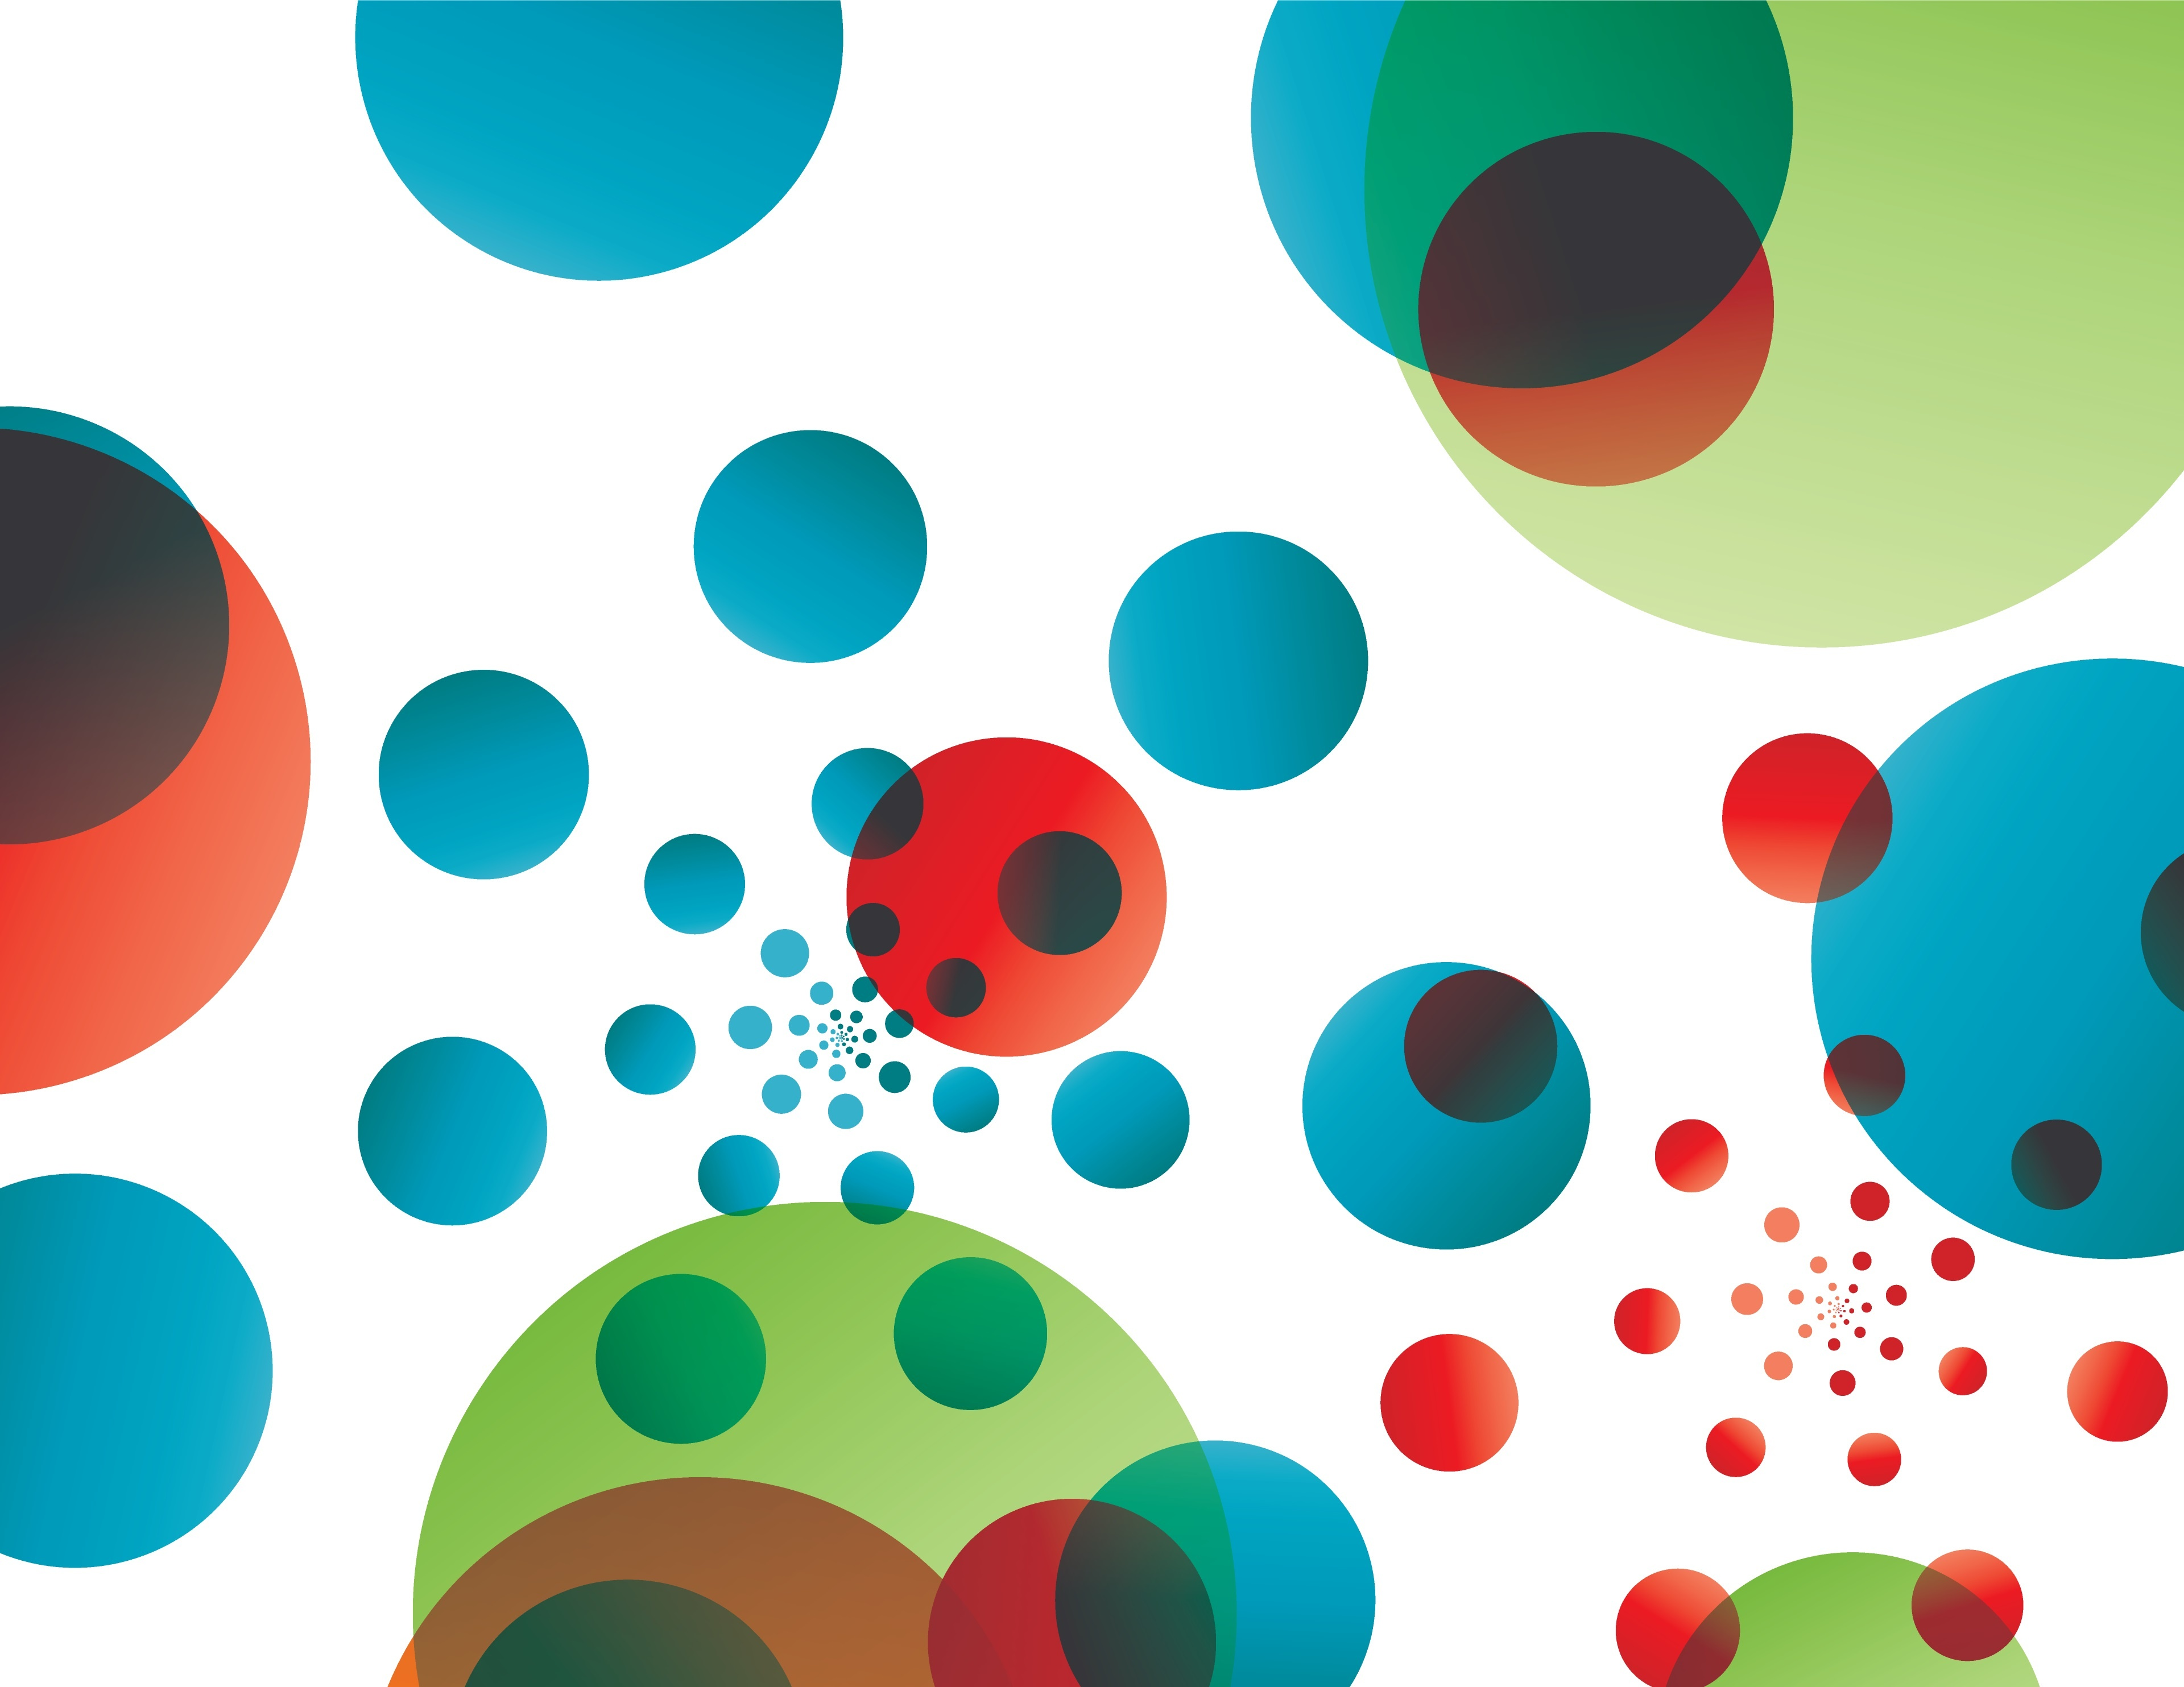

In [5]:
img = cv2.imread(IMAGE_DIR + IMAGE_NAME)
display_cv_image(img)

In [6]:
rows,cols,ch = img.shape
img.shape

(2967, 3840, 3)

### 切り取り範囲と回転後のイメージ
以下のセルを実行して切り取り範囲と回転方向が正しいか確認してください。

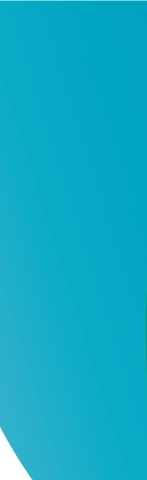

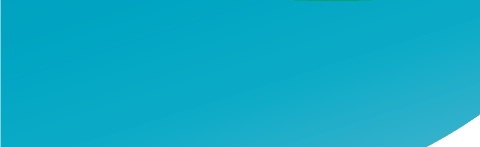

In [7]:
# 一度切り取りを行うと画像を読み込んだオブジェクトが変更されるため再読み込み
img = cv2.imread(IMAGE_DIR + IMAGE_NAME)

img, target, clockwise = cut_rotate_image(img, x_0, y_0, width, height, ROTATE_DIGREE, FILL_COLOR_FLAG, FILL_COLOR)
display_cv_image(target)
display_cv_image(clockwise)

### 貼り付け後のイメージ確認
以下のセルを実行して貼り付け先が正しいか確認してください。

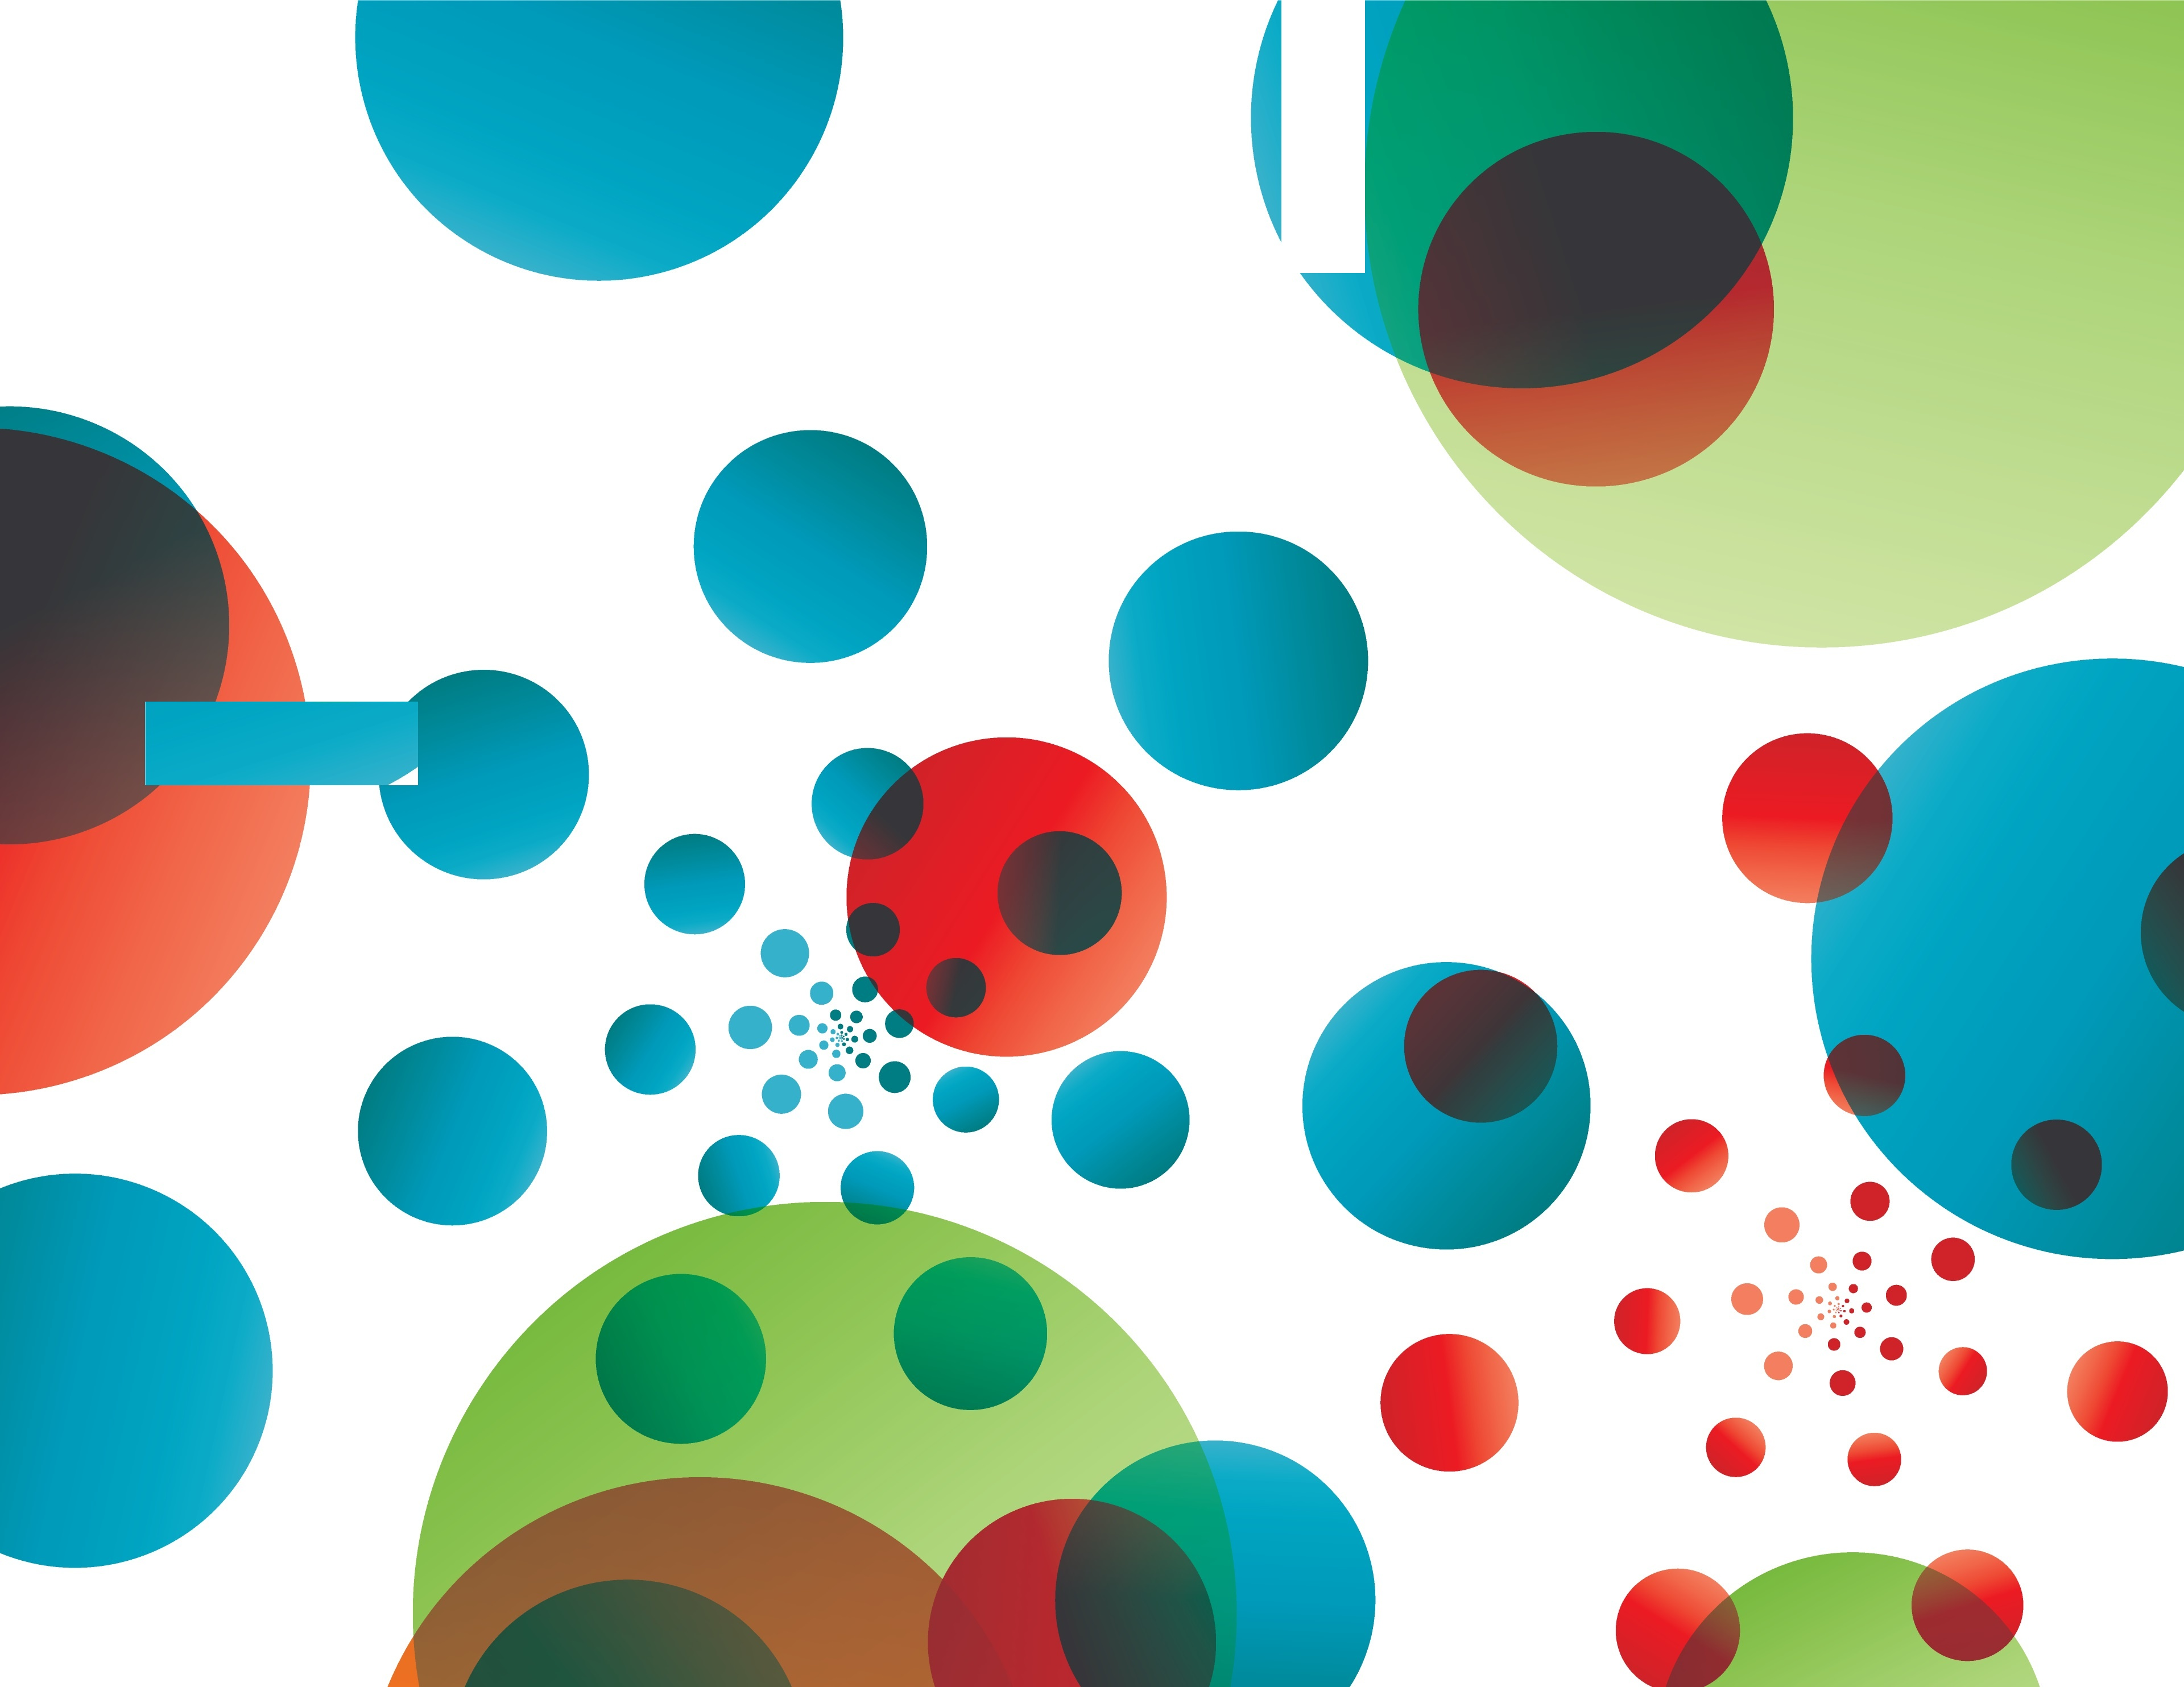

In [8]:
# 一度貼り付けを行うと画像を読み込んだオブジェクトが変更されるため再読み込み
img = cv2.imread(IMAGE_DIR + IMAGE_NAME)

img, target, clockwise = cut_rotate_image(img, x_0, y_0, width, height, ROTATE_DIGREE, FILL_COLOR_FLAG, FILL_COLOR)
pasted_img = paste_rotate_image(img, x_0, y_0, width, height, clockwise)
display_cv_image(pasted_img)

### ファイルの保存
以下のセルを実行するとファイルが保存できます。OUTPUT_DIRが存在しないとか、ファイルが作成できない場合は「False」が返ってきます

In [9]:
file_name, extension = IMAGE_NAME.split('.')
cv2.imwrite(OUTPUT_DIR + file_name + '_rotated' + '.' + extension, pasted_img)

True

## Part2:ディレクトリ内の画像に鮮明化を実施
Part1で調整した座標を用いてディレクトリ内の画像に切り取りと回転を実施します。

In [10]:
files =  [f for f in os.listdir(IMAGE_DIR) if re.search('.*\.(jpg)', f, re.IGNORECASE)]
print('以下のファイルに処理します。')
print(files)

以下のファイルに処理します。
['test001.jpg', 'test002.jpg']


In [11]:
for file in files:
    img = cv2.imread(IMAGE_DIR + file)
    img, _, clockwise = cut_rotate_image(img, x_0, y_0, width, height, ROTATE_DIGREE, FILL_COLOR_FLAG, FILL_COLOR)
    pasted_img = paste_rotate_image(img, x_0, y_0, width, height, clockwise)
    # 画像の保存
    file_name, extension = file.split('.')
    cv2.imwrite(OUTPUT_DIR + file_name + '_rotated' + '.' + extension, pasted_img)